## 1.주제: UFC 데이터를 이용한 Favorite/Underdog의 승률 분석

### 들어가기 전
UFC에서는 두 선수의 시합이 결정되면 오즈 메이커(oddsmaker: 다양한 경기의 승산을 측정하는 프로)가 두 선수의 주된 무술 스타일의 상성, 현재 기세, 자세, 리치,등의 정보를 종합해 누가 더 우세한지를 결정한다. 이에 따라 도박사들은 자신이 어느 선수에 배팅을 할지 결정하게 된다. 승률이 높은 쪽을 'Favorite', 낮은 쪽을 'Underdog'이라 칭하고 경기장에서의 코너 색깔도 이에 따라 결정된다. 보통 'Favorite'에 속하는 선수들이 'Red'코너를 배정받고, 'Underdog'에 속하는 선수들이 'Blue'코너를 배정 받는다.

### 주제 선정 이유




## 2. 가설 혹은 명제

#### 가설1. Red코너가 Blue코너보다 승률이 더 높을 것이다.

#### 가설2. 최근으로 올수록 선수의 능력치 측정 기술이 높아짐에 따라 Red의 승률이 더 높을 것이다.

#### 가설3. 헤비급은 한방 싸움이기 때문에 상대적으로 다른 체급에 비해 upset이 많이 일어날 것이다.
           (upset:'Underdog'이 'Favorite'을 이기는 경우)


## 3. 데이터 획득 및 가공

#### 1. 1993년부터 2021년까지의 UFC 경기 기록
https://www.kaggle.com/datasets/rajeevw/ufcdata
#### 2. 위 데이터에 대한 구체적인 설명
https://github.com/WarrierRajeev/UFC-Predictions
#### 3. UFC 공식 사이트
http://statleaders.ufc.com/

## 4. 데이터 분석

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 분석할 주된 데이터

In [29]:
df= pd.read_csv('./UFC.csv', encoding= 'cp949')
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,190.50,NaN,260.0,NaN,NaN
6008,Orlando Wiet,Robert Lucarelli,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Southpaw,177.80,NaN,170.0,NaN,NaN
6009,Johnny Rhodes,David Levicki,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,182.88,NaN,210.0,NaN,NaN
6010,Patrick Smith,Ray Wizard,John McCarthy,1994-03-11,"Denver, Colorado, USA",Red,False,OpenWeight,NaN,NaN,...,0,0,0,0,Orthodox,187.96,NaN,225.0,NaN,30.0


In [31]:
df.columns

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_Stance', 'R_Height_cms',
       'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age'],
      dtype='object', length=144)

In [32]:
df.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [26]:
used_columns = ['R_fighter', 'B_fighter', 'date', 'Winner', 'weight_class']

In [81]:
ufc_df = df[used_columns]
ufc_df

,R_fighter,B_fighter,date,Winner,weight_class
0,Adrian Yanez,Gustavo Lopez,2021-03-20,Red,Bantamweight
1,Trevin Giles,Roman Dolidze,2021-03-20,Red,Middleweight
2,Tai Tuivasa,Harry Hunsucker,2021-03-20,Red,Heavyweight
3,Cheyanne Buys,Montserrat Conejo,2021-03-20,Blue,WomenStrawweight
4,Marion Reneau,Macy Chiasson,2021-03-20,Blue,WomenBantamweight
...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Red,OpenWeight
6008,Orlando Wiet,Robert Lucarelli,1994-03-11,Red,OpenWeight
6009,Johnny Rhodes,David Levicki,1994-03-11,Red,OpenWeight
6010,Patrick Smith,Ray Wizard,1994-03-11,Red,OpenWeight


In [82]:
ufc_df.describe()

,R_fighter,B_fighter,date,Winner,weight_class
count,6012,6012,6012,6012,6012
unique,1514,1987,550,3,14
top,Jim Miller,Jeremy Stephens,2016-11-19,Red,Lightweight
freq,27,21,25,3979,1091


## 가설1

In [83]:
ufc_df['Winner'].value_counts()

Red     3979
Blue    1923
Draw     110
Name: Winner, dtype: int64

<AxesSubplot:>

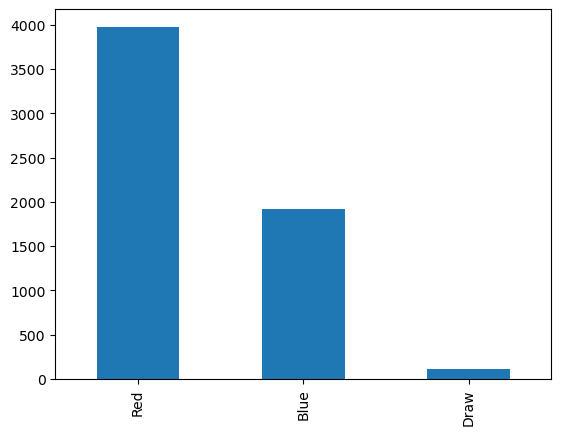

In [84]:
ufc_df.Winner.value_counts().plot.bar() #

## 가설2

In [109]:
year = ufc_df['date'][:].astype(int)
year

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
6007    1994
6008    1994
6009    1994
6010    1994
6011    1994
Name: date, Length: 6012, dtype: int64

In [115]:
ufc_df

,R_fighter,B_fighter,date,Winner,weight_class
0,Adrian Yanez,Gustavo Lopez,2021,Red,Bantamweight
1,Trevin Giles,Roman Dolidze,2021,Red,Middleweight
2,Tai Tuivasa,Harry Hunsucker,2021,Red,Heavyweight
3,Cheyanne Buys,Montserrat Conejo,2021,Blue,WomenStrawweight
4,Marion Reneau,Macy Chiasson,2021,Blue,WomenBantamweight
...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,1994,Red,OpenWeight
6008,Orlando Wiet,Robert Lucarelli,1994,Red,OpenWeight
6009,Johnny Rhodes,David Levicki,1994,Red,OpenWeight
6010,Patrick Smith,Ray Wizard,1994,Red,OpenWeight


In [110]:
ufc_df['date'].min(), ufc_df['date'].max() 

(1994, 2021)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

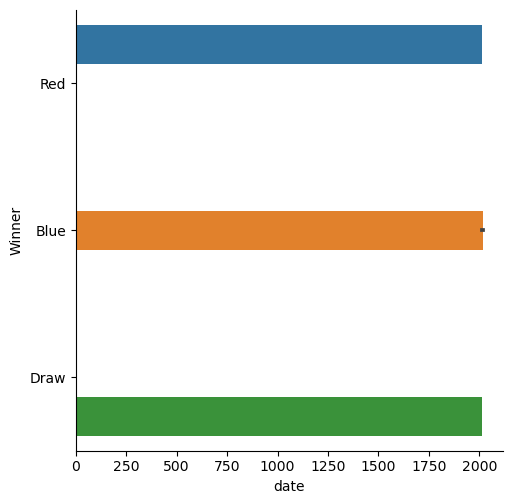

In [112]:
import seaborn as sns

sns.catplot(x=ufc_df['date'],y="Winner", hue= "Winner", data= ufc_df, kind='bar')
